##### Liens utiles:
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
https://medium.com/swlh/k-means-clustering-on-high-dimensional-data-d2151e1a4240

## Extraction des données

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

https://en.wikipedia.org/wiki/Iris_flower_data_set

In [2]:
#iris.DESCR
iris?

In [3]:
#iris.target_names --- 0 = setosa, 1=versicolor, 2= viriginica
#iris.feature_names --- sepal length, width, petal length, i=width

In [4]:
X = iris["data"]

## Projection des données

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X)

In [7]:
pca.explained_variance_ratio_ #Comment ca fonctionne?

array([0.92461872, 0.05306648])

## Application du k-means

In [8]:
import numpy as np
from sklearn.cluster import KMeans

np.random.seed(0)

In [9]:
np.mean(X,axis=0)

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [40]:
def k_means(n_clusters,data,max_iter):
    """
    Renvoie un tuple contenant:
    - la liste des centres de chaque cluster
    - un dictionnaire avec un ensemble des points contenus dans chaque cluster
    chaque liste est associé à la valeur du numéro du cluster auquel il correspond 
    """
    centroid = []
    cluster = {}
    cluster_not_the_same = True
    c = 0
       
    for i in range(n_clusters):
        centroid.append(np.random.uniform(data.min(axis=0),data.max(axis=0)))    
    
    # Tant que la condition d'arrêt n'est pas respecté 
    while(c!=max_iter and cluster_not_the_same):
        c += 1
        new_centroid=[]
        
        for i in range(n_clusters):
            cluster[i]=[]
        
        #Assignation des points en fonction de leurs clusters
        for point in data:
            # Aucun cluster n'est assigné au point
            clust = (None,float('inf')) # (numéro du cluster,distance au cluster)
            
            for i in range(n_clusters):
                dist = np.linalg.norm(point-centroid[i])
                #Si le centre du cluster est plus proche que ceux étudiés avant nous le remplaçons
                if dist<clust[1]:
                    clust = (i,dist)
            
            cluster[clust[0]].append(point)
        
        # Recalcule les centres
        for i in range(n_clusters):
            new_centroid.append(np.mean(cluster[i],axis=0))
        
        # On regarde si les centres sont toujours les mêmes
        if (np.array_equal(new_centroid,centroid)): 
            cluster_not_the_same= False
        else:
            centroid=new_centroid
    
    return (centroid,cluster)

## Comparaison des données

In [41]:
# Calculs avec les différents k_means
kmeans = KMeans(n_clusters=2, random_state=0,max_iter=500).fit(X_transformed)
centre, cluster = k_means(2,X_transformed,500)

In [42]:
kmeans.cluster_centers_

array([[-2.53737542,  0.12775509],
       [ 1.38640101, -0.06980433]])

In [43]:
centre

[array([ 1.38640101, -0.06980433]), array([-2.53737542,  0.12775509])]

In [44]:
Y_cluster = kmeans.labels_

In [48]:
X_kmeans.shape

(150, 2)

In [47]:
X_kmeans = np.array(cluster[0]+cluster[1])
Y_kmeans= [0]*len(cluster[0]) + [1]*len(cluster[1])

## Représentation des données

In [49]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Résultat avec la fonction de la librairie')

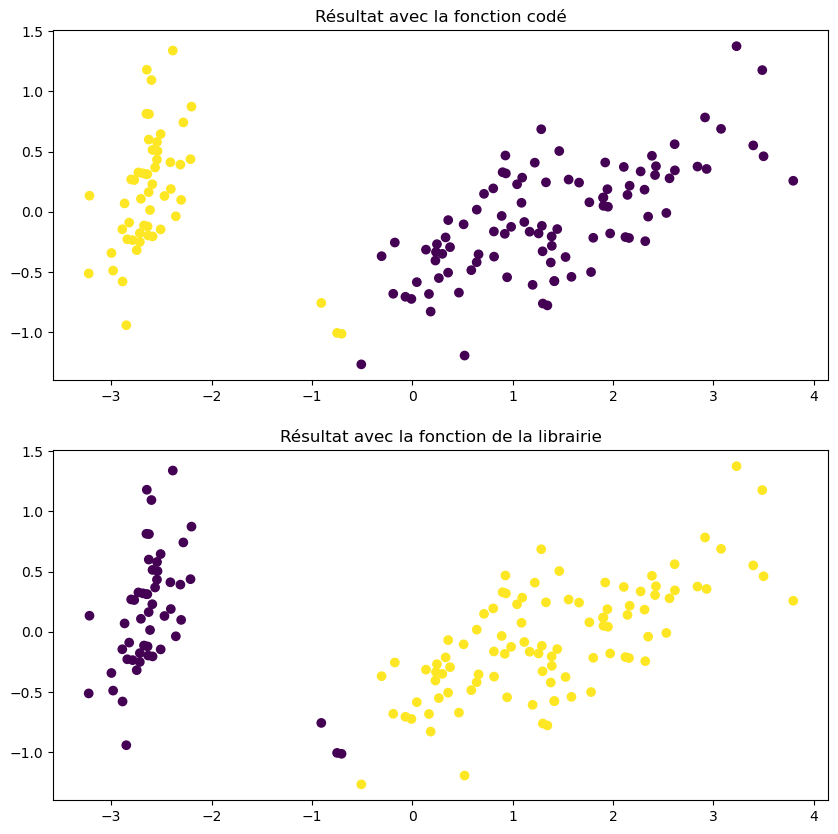

In [51]:
# Création des labels en fonction des résultats de la fonction 
fig,ax = plt.subplots(2,figsize=(10,10))

ax[0].scatter(X_kmeans[:,0],X_kmeans[:,1],c=Y_kmeans)
ax[0].set_title("Résultat avec la fonction codé")
ax[1].scatter(X_transformed[:,0],X_transformed[:,1],c=Y_cluster)
ax[1].set_title("Résultat avec la fonction de la librairie")

Les clusters trouvés sont les mêmes, de même pour les centres 